In [1]:
from sklearn.datasets import load_boston
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import seaborn as sns

In [2]:
house = load_boston()

In [3]:
print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<center><img src="boston.png"  width=800></center>

In [4]:
x = house.data
y = house.target

In [5]:
df = pd.DataFrame(x, columns=house.feature_names)
df['Target'] = pd.DataFrame(y, columns=['Target'])

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


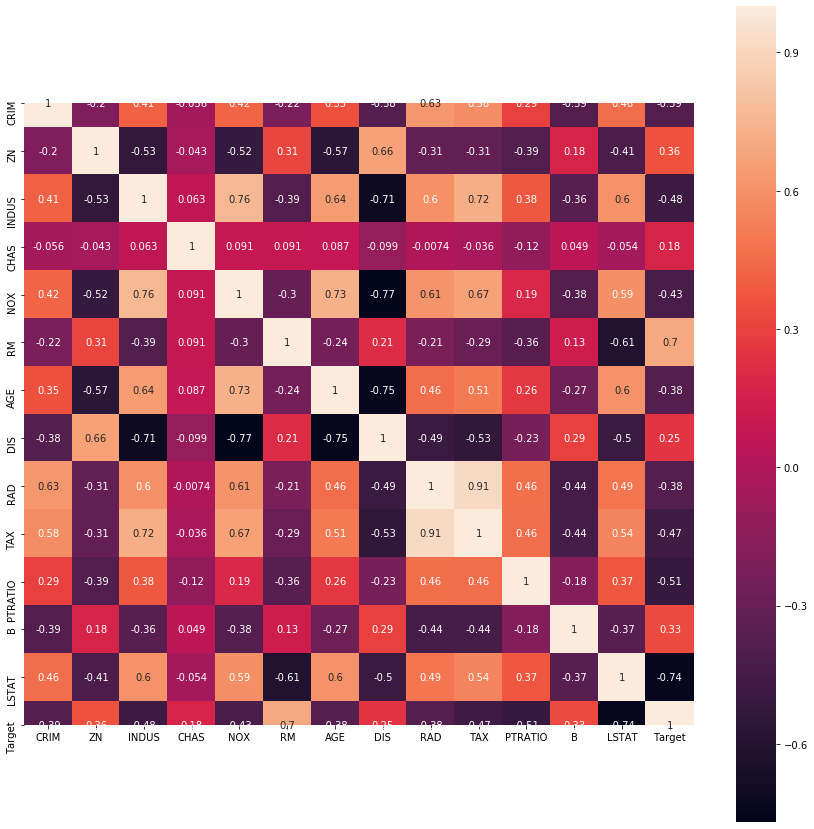

In [7]:
plt.figure(figsize=(15,15))  
# 画热力图，数值为两个变量之间的相关系数
p=sns.heatmap(df.corr(), annot=True, square=True) 

In [13]:
# 数据标准化（类似归一化）
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)

In [14]:
print(x[:5])

[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


In [10]:
from sklearn.model_selection import train_test_split
# 切分数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [11]:
# 创建模型
model = LassoCV()
model.fit(x_train, y_train)

# lasso系数
print(model.alpha_)
# 相关系数
print(model.coef_)

0.026605492023727605
[-0.15063323  0.72249788 -0.0111001   0.50383284 -1.8104729   2.94537059
 -0.2008692  -2.65906037  1.90097139 -1.70583007 -1.9999259   0.8827399
 -3.18477567]


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [15]:
#决定系数 衡量模型的好坏
model.score(x_test, y_test)

0.7028766660231405